## GROUP N°

## NAMES 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import other libraries when needed 

## 1. DATA PROCESSING

In [2]:
# Load raw data
df = pd.read_parquet("dataDumper.parquet")

In [3]:
df.head()

,Time_utc,VehicleName,VehicleType,Pressure_Pa_1,Pressure_Pa_2,Pressure_Pa_3,Pressure_Pa_4,Pressure_Pa_5,Pressure_Pa_6,Temperature_K_1,...,Altitude_m,Speed_mps,epsilonX,epsilonY,epsilonZ,epsilonSpeed,AtmosphericPressure_Pa,dt_s,dd_m,RatioPayload
0,2023-01-01 00:00:00.328,C-132,Dumper,993010.933333,1.003995e+06,856000.0,798005.466667,819994.533333,864994.533333,346.15,...,4581.000000,9.003,6.207,6.312,23.000000,0.0,59002.557667,4.912,41.480140,0.0
1,2023-01-01 00:00:05.338,C-132,Dumper,993177.933329,1.003911e+06,856000.0,798088.966665,819911.033335,864911.033335,346.15,...,4577.600098,9.003,6.393,6.797,27.600000,0.0,59028.296172,5.010,45.952211,0.0
2,2023-01-01 00:00:10.331,C-132,Dumper,993344.366669,1.003828e+06,856000.0,798172.183334,819827.816666,864827.816666,346.15,...,4573.000000,9.723,6.721,7.631,32.200001,0.0,59064.789917,4.993,47.007842,0.0
3,2023-01-01 00:00:15.325,C-132,Dumper,993510.833331,1.003745e+06,856000.0,798255.416666,819744.583334,864744.583334,346.15,...,4568.600098,9.620,6.361,6.504,23.000000,0.0,59101.596928,4.994,48.700870,0.0
4,2023-01-01 00:00:20.448,C-132,Dumper,993681.600000,1.003659e+06,856000.0,798340.800000,819659.200000,864659.200000,346.15,...,4564.500000,11.318,6.361,7.144,23.000000,0.0,59139.354701,5.123,52.675397,0.0


In [4]:
df.columns

Index(['Time_utc', 'VehicleName', 'VehicleType', 'Pressure_Pa_1',
       'Pressure_Pa_2', 'Pressure_Pa_3', 'Pressure_Pa_4', 'Pressure_Pa_5',
       'Pressure_Pa_6', 'Temperature_K_1', 'Temperature_K_2',
       'Temperature_K_3', 'Temperature_K_4', 'Temperature_K_5',
       'Temperature_K_6', 'ColdPressure_Pa_1', 'ColdPressure_Pa_2',
       'ColdPressure_Pa_3', 'ColdPressure_Pa_4', 'ColdPressure_Pa_5',
       'ColdPressure_Pa_6', 'Latitude_dd', 'Longitude_dd', 'Altitude_m',
       'Speed_mps', 'epsilonX', 'epsilonY', 'epsilonZ', 'epsilonSpeed',
       'AtmosphericPressure_Pa', 'dt_s', 'dd_m', 'RatioPayload'],
      dtype='object')

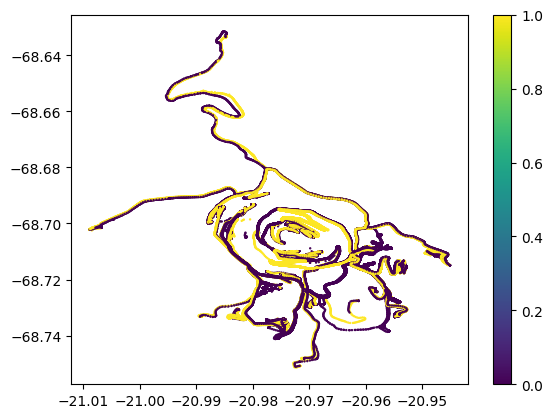

In [5]:
plt.scatter(x = df['Latitude_dd'], y = df['Longitude_dd'], s=0.5, c=df['RatioPayload'])
plt.colorbar()

In [6]:
plot = df[['Longitude_dd','Latitude_dd']]

## Trajectory Construction

In [7]:
# Create Segments based on  RatioPayLoad
df[['phaseNb']] = df[['RatioPayload']].diff().abs().cumsum()

In [8]:
#Split the data into loaded trajectories and empty trajectories
segment_list = [data_phase for _, data_phase in df.groupby('phaseNb')]
empty_segment_list = []
load_segment_list = []

for segment in segment_list:
    if segment.RatioPayload.mean() == 0.0:
        empty_segment_list.append(segment)
    elif segment.RatioPayload.mean() == 1.0:
        load_segment_list.append(segment)

In [9]:
print(f'N° of Loaded segments :{len(load_segment_list)}')
print(f'N° of Empty segments :{len(empty_segment_list)}')

N° of Loaded segments :263
N° of Empty segments :263


<Axes: xlabel='Latitude_dd', ylabel='Longitude_dd'>

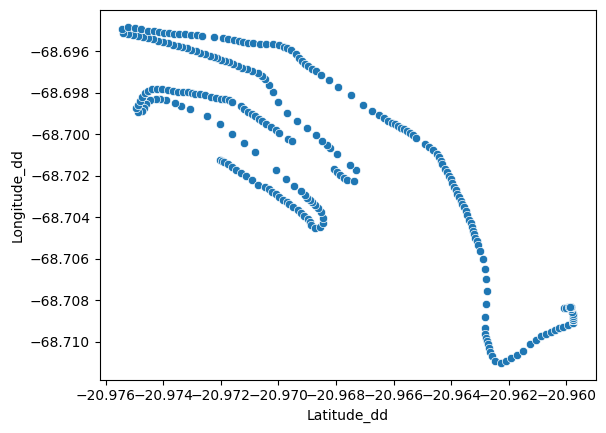

In [10]:
sns.scatterplot(x = load_segment_list[5]['Latitude_dd'],
                y = load_segment_list[5]['Longitude_dd'])

## 2. DATA ANALYSIS

Perform a comprehensive analysis of the dataset to uncover underlying patterns or characteristics. Visualize data distributions and relationships, such as speed vs. time, acceleration profiles, or geographical movements ... BE CURIOUS 

In [11]:
# ANALYSE THE MUTLIVARIATE TIME SERIES, TRY TO FIND PATTERNS AND CORRELATIONS INT THE DATA
# CHECK HOW THE DUMPER BEHAVES, SPEED, ACCELERATION, ... ETC
df['denivele'] = df['Altitude_m'].diff()
df.head()

,Time_utc,VehicleName,VehicleType,Pressure_Pa_1,Pressure_Pa_2,Pressure_Pa_3,Pressure_Pa_4,Pressure_Pa_5,Pressure_Pa_6,Temperature_K_1,...,epsilonX,epsilonY,epsilonZ,epsilonSpeed,AtmosphericPressure_Pa,dt_s,dd_m,RatioPayload,phaseNb,denivele
0,2023-01-01 00:00:00.328,C-132,Dumper,993010.933333,1.003995e+06,856000.0,798005.466667,819994.533333,864994.533333,346.15,...,6.207,6.312,23.000000,0.0,59002.557667,4.912,41.480140,0.0,NaN,NaN
1,2023-01-01 00:00:05.338,C-132,Dumper,993177.933329,1.003911e+06,856000.0,798088.966665,819911.033335,864911.033335,346.15,...,6.393,6.797,27.600000,0.0,59028.296172,5.010,45.952211,0.0,0.0,-3.399902
2,2023-01-01 00:00:10.331,C-132,Dumper,993344.366669,1.003828e+06,856000.0,798172.183334,819827.816666,864827.816666,346.15,...,6.721,7.631,32.200001,0.0,59064.789917,4.993,47.007842,0.0,0.0,-4.600098
3,2023-01-01 00:00:15.325,C-132,Dumper,993510.833331,1.003745e+06,856000.0,798255.416666,819744.583334,864744.583334,346.15,...,6.361,6.504,23.000000,0.0,59101.596928,4.994,48.700870,0.0,0.0,-4.399902
4,2023-01-01 00:00:20.448,C-132,Dumper,993681.600000,1.003659e+06,856000.0,798340.800000,819659.200000,864659.200000,346.15,...,6.361,7.144,23.000000,0.0,59139.354701,5.123,52.675397,0.0,0.0,-4.100098


In [12]:
df['mean_temp_avant'] = (df['Temperature_K_1'] + df['Temperature_K_2'])/2
df['mean_temp_arriere'] = (df['Temperature_K_3'] + df['Temperature_K_4'] + df['Temperature_K_5'] + df['Temperature_K_6'])/4

In [13]:
#Split the data into loaded trajectories and empty trajectories
segment_list = [data_phase for _, data_phase in df.groupby('phaseNb')]
empty_segment_list = []
load_segment_list = []

for segment in segment_list:
    if segment.RatioPayload.mean() == 0.0:
        empty_segment_list.append(segment)
    elif segment.RatioPayload.mean() == 1.0:
        load_segment_list.append(segment)

## 3. Distance Metrics for Trajectories 
Learn and apply suitable distance measures for trajectories. These may include Euclidean distance, Dynamic Time Warping (DTW), or Fréchet distance. Experiment with different metrics to find the most suitable one for clustering vehicle trajectories.
Trajectory Construction ( Based on the preprocessed data, construct trajectories that reflect the vehicle's movement over time. Define how you will represent a trajectory (e.g., as a series of time-stamped GPS coordinates or motion states).

In [16]:
from tslearn.metrics import dtw
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

# 1. Préparer une liste de trajectoires (L x N x 2)
# L = nombre de segments, N = nombre de points (doit être fixe ou géré par DTW)
X = [seg[['Latitude_dd', 'Longitude_dd']].values for seg in load_segment_list]

from tslearn.preprocessing import TimeSeriesResampler

# On ramène chaque trajectoire à exactement 50 points
resampler = TimeSeriesResampler(sz=50)
X_resampled = resampler.fit_transform(X) # X est votre liste initiale

# On applique l'échelle sur les données rééchantillonnées
X_scaled = TimeSeriesScalerMeanVariance().fit_transform(X_resampled)

# 3. Calcul de la distance DTW entre deux trajets
distance = dtw(X_scaled[0], X_scaled[1])
print(f"Distance DTW : {distance}")

Distance DTW : 11.232583054234297


In [20]:
from tslearn.clustering import TimeSeriesKMeans

n_clusters=5

model = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", verbose=True)
labels = model.fit_predict(X_scaled)

# Ajoutez les labels à votre liste de segments pour les visualiser
for i, segment in enumerate(load_segment_list):
    segment['cluster'] = labels[i]

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 263 out of 263 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 789 out of 789 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 789 out of 789 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 789 out of 789 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elaps

28.131 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done 1315 out of 1315 | elapsed:    2.5s finished


14.712 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done 1315 out of 1315 | elapsed:    2.3s finished


14.620 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 1315 out of 1315 | elapsed:    1.7s finished


14.601 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done 1315 out of 1315 | elapsed:    1.8s finished


14.582 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 1315 out of 1315 | elapsed:    1.2s finished


14.575 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 1315 out of 1315 | elapsed:    1.2s finished


14.575 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 1315 out of 1315 | elapsed:    1.1s finished


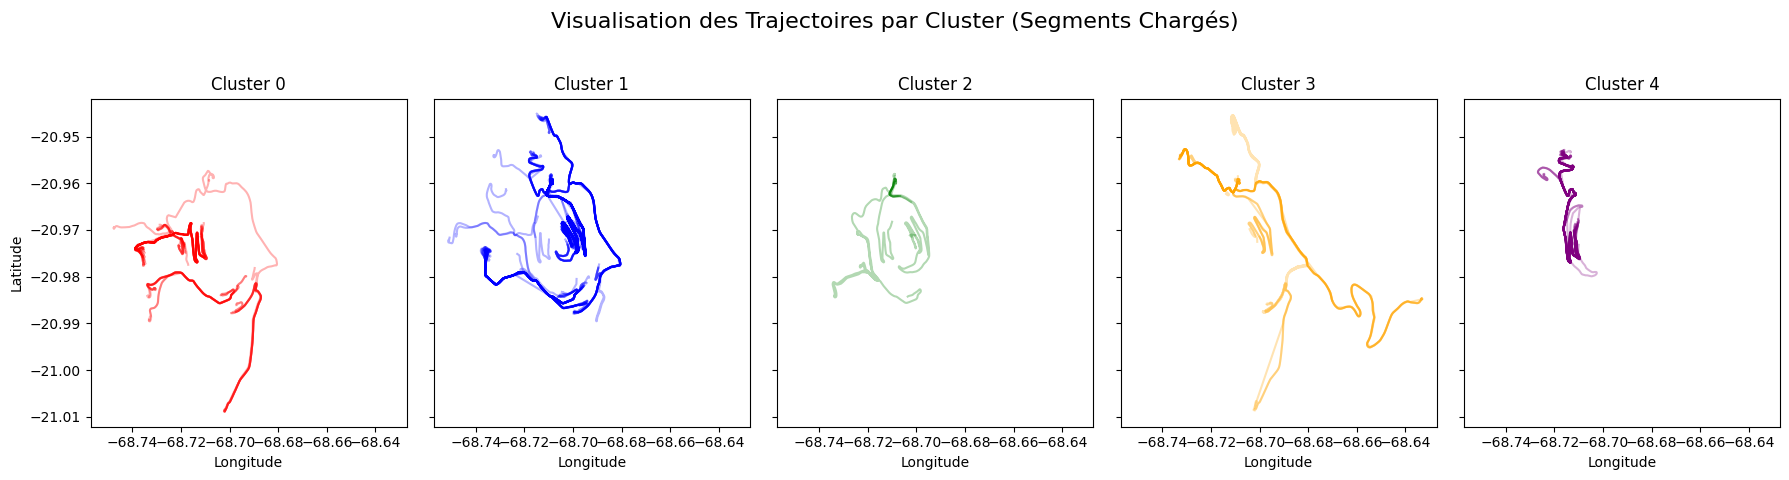

In [21]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, n_clusters, figsize=(18, 5), sharex=True, sharey=True)
colors = ['red', 'blue', 'green', 'orange', 'purple']

for cluster_id in range(n_clusters):
    ax = axes[cluster_id]
    # Sélectionner les segments appartenant au cluster actuel
    for i, segment in enumerate(load_segment_list):
        if labels[i] == cluster_id:
            ax.plot(segment['Longitude_dd'], segment['Latitude_dd'], 
                    color=colors[cluster_id % len(colors)], alpha=0.3)
    
    ax.set_title(f"Cluster {cluster_id}")
    ax.set_xlabel("Longitude")
    if cluster_id == 0:
        ax.set_ylabel("Latitude")

plt.suptitle("Visualisation des Trajectoires par Cluster (Segments Chargés)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

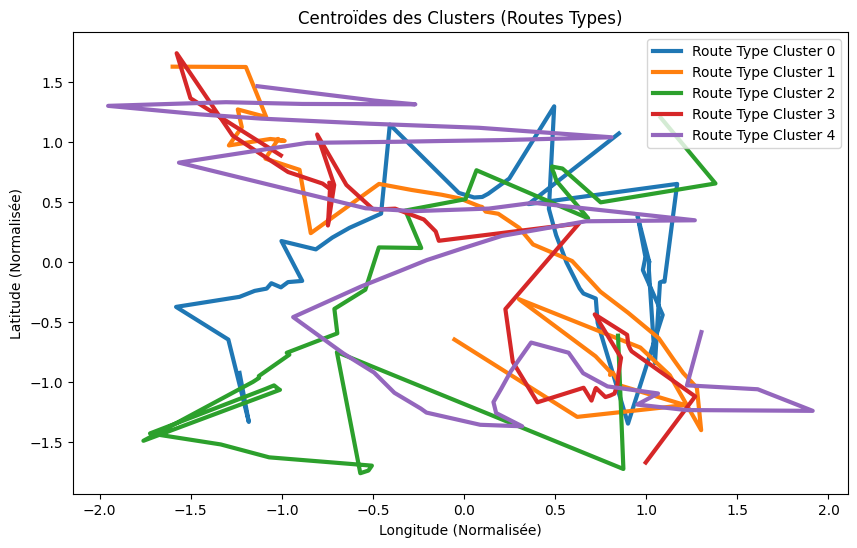

In [23]:
plt.figure(figsize=(10, 6))
for i in range(n_clusters):
    # Les centroïdes sont stockés dans cluster_centers_
    # Format (50, 2) : 50 points, colonnes [Lat, Long]
    centroid = model.cluster_centers_[i]
    plt.plot(centroid[:, 1], centroid[:, 0], label=f'Route Type Cluster {i}', linewidth=3)

plt.title("Centroïdes des Clusters (Routes Types)")
plt.xlabel("Longitude (Normalisée)")
plt.ylabel("Latitude (Normalisée)")
plt.legend()
plt.show()